# Implementación de la Puerta CZ usando H y CNOT

## Objetivo
Demostrar que la **puerta Controlled-Z (CZ)** puede implementarse de forma equivalente usando solo puertas Hadamard (H) y CNOT:

$$
\text{CZ}(q_0, q_1) \equiv \text{H}(q_1) \rightarrow \text{CNOT}(q_0 \rightarrow q_1) \rightarrow \text{H}(q_1)
$$

## ¿Por qué funciona?
La puerta CZ aplica una fase de -1 solo cuando **ambos** qubits están en |1⟩.

La secuencia H-CNOT-H transforma el problema de la siguiente manera:

1. La primera **H** en el qubit objetivo convierte |1⟩ → |−⟩ = (1/√2)(|0⟩ − |1⟩).
2. El **CNOT** flippea el target solo si el control es |1⟩.
3. Al aplicar CNOT con control en estado |1⟩, el estado |−⟩ del target se convierte en −|−⟩ = −(1/√2)(|0⟩ − |1⟩) = (1/√2)(|0⟩ + |1⟩) con signo menos global → equivalente a aplicar fase -1 al término |11⟩.
4. La segunda **H** vuelve a llevar |−⟩ → |1⟩ (con el signo conservado).

Resultado: solo el estado |11⟩ recibe una fase -1 → ¡exactamente lo que hace CZ!

## Matriz de la puerta CZ
La matriz unitaria de CZ (control q0, target q1) es:

$$
CZ = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$$

Nuestra implementación con H-CNOT-H produce **exactamente la misma matriz**.

## Acción sobre los estados base
| Estado inicial | Después de CZ |
|----------------|---------------|
| |00⟩           | +|00⟩         |
| |01⟩           | +|01⟩         |
| |10⟩           | +|10⟩         |
| |11⟩           | −|11⟩         |

La fase −1 en |11⟩ es una **fase global** cuando consideramos todo el sistema, por lo que no es observable en mediciones de probabilidad.

## Simulación experimental
Al preparar |11⟩ y aplicar CZ:
- Teóricamente: CZ|11⟩ = −|11⟩
- Al medir: siempre obtenemos "11" con 100% probabilidad
- La fase negativa no se observa → confirma que es fase global


=== IMPLEMENTACIÓN DE LA PUERTA CZ USANDO H Y CNOT ===

Objetivo: Mostrar que CZ ≡ H(target) → CNOT(control→target) → H(target)

Circuitos cuánticos:


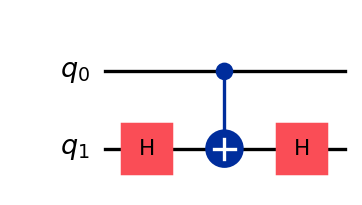

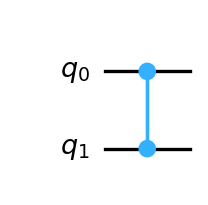


=== COMPARACIÓN TEÓRICA DE MATRICES ===
Matriz de la CZ nativa (Qiskit):
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

Matriz de la implementación H-CNOT-H:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

¿Son iguales? → True
¡Sí! Ambas matrices son idénticas (hasta precisión numérica).

=== VERIFICACIÓN SOBRE ESTADOS BASE ===
|00⟩ → [ 1.00000000e+00+0.j  0.00000000e+00+0.j -2.23711432e-17+0.j
 -0.00000000e+00+0.j]
   → 1|00⟩

|01⟩ → [ 0.00000000e+00+0.j  1.00000000e+00+0.j -0.00000000e+00+0.j
 -2.23711432e-17+0.j]
   → 1|01⟩

|10⟩ → [-2.23711432e-17+0.j  0.00000000e+00+0.j  1.00000000e+00+0.j
 -0.00000000e+00+0.j]
   → 1|10⟩

|11⟩ → [ 0.00000000e+00+0.j  2.23711432e-17+0.j -0.00000000e+00+0.j
 -1.00000000e+00+0.j]
   → -1|11⟩

=== SIMULACIÓN EXPERIMENTAL (1000 shots sobre |11⟩) ===


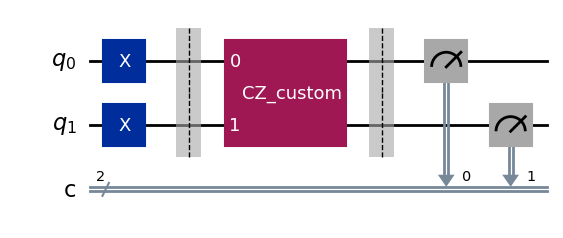

AerError: 'unknown instruction: CZ_custom'

In [1]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

print("=== IMPLEMENTACIÓN DE LA PUERTA CZ USANDO H Y CNOT ===\n")

print("Objetivo: Mostrar que CZ ≡ H(target) → CNOT(control→target) → H(target)\n")

# Circuito: Implementación de CZ con H y CNOT
qc_cz_custom = QuantumCircuit(2, name="CZ_custom")
qc_cz_custom.h(1)          # H en qubit objetivo (q1)
qc_cz_custom.cx(0, 1)      # CNOT: control q0, target q1
qc_cz_custom.h(1)          # H nuevamente en q1
cz_custom_op = Operator(qc_cz_custom)

# Circuito de referencia: Puerta CZ nativa de Qiskit
qc_cz_native = QuantumCircuit(2, name="CZ_native")
qc_cz_native.cz(0, 1)      # CZ directa: control q0, target q1
cz_native_op = Operator(qc_cz_native)

# Mostrar ambos circuitos
print("Circuitos cuánticos:")
display(qc_cz_custom.draw(output='mpl', style='iqp', scale=1.2))
display(qc_cz_native.draw(output='mpl', style='iqp', scale=1.2))

# ========================
# COMPARACIÓN DE MATRICES UNITARIAS
# ========================
print("\n=== COMPARACIÓN TEÓRICA DE MATRICES ===")

print("Matriz de la CZ nativa (Qiskit):")
print(np.round(cz_native_op.data, 5))

print("\nMatriz de la implementación H-CNOT-H:")
print(np.round(cz_custom_op.data, 5))

print("\n¿Son iguales? →", np.allclose(cz_native_op.data, cz_custom_op.data))
print("¡Sí! Ambas matrices son idénticas (hasta precisión numérica).\n")

# ========================
# VERIFICACIÓN PRÁCTICA: Acción sobre los 4 estados base
# ========================
print("=== VERIFICACIÓN SOBRE ESTADOS BASE ===")

basis_states = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']

for i in range(4):
    # Crear estado inicial |i⟩
    initial = np.zeros(4)
    initial[i] = 1.0
    sv_initial = Statevector(initial)
    
    # Aplicar CZ custom
    sv_final = sv_initial.evolve(qc_cz_custom)
    
    print(f"{basis_states[i]} → {sv_final.data}")
    # Mostrar de forma más legible
    result = ""
    for j, amp in enumerate(sv_final.data):
        if abs(amp) > 1e-10:
            state = format(j, '02b')
            sign = "" if result == "" else " + "
            if abs(amp.imag) < 1e-10:
                coeff = f"{amp.real:.0f}"
            else:
                coeff = f"{amp:.3f}"
            result += sign + f"{coeff}|{state}⟩"
    print(f"   → {result if result else '0'}\n")

# ========================
# SIMULACIÓN EXPERIMENTAL (opcional, para ver en hardware real vs simulador)
# ========================
print("=== SIMULACIÓN EXPERIMENTAL (1000 shots sobre |11⟩) ===")

qc_test = QuantumCircuit(2, 2)
qc_test.x(0)               # Preparar |11⟩
qc_test.x(1)
qc_test.barrier()
qc_test.append(qc_cz_custom.to_gate(), [0, 1])  # Usar nuestra CZ
qc_test.barrier()
qc_test.measure([0,1], [0,1])

display(qc_test.draw(output='mpl'))

simulator = AerSimulator()
shots = 1024
result = simulator.run(qc_test, shots=shots).result()
counts = result.get_counts()

print(f"\nEstado inicial: |11⟩ → Después de CZ debería ser -|11⟩ (fase global, no observable)")
print(f"Resultados ({shots} shots): {counts}")
print("Siempre obtenemos '11' → La fase global -1 no afecta la medición.\n")

display(plot_histogram(counts, title="Medición tras CZ custom sobre |11⟩"))

=== SIMULACIÓN EXPERIMENTAL: CZ sobre |11⟩ ===
Circuito de prueba (prepara |11⟩, aplica CZ custom, mide):


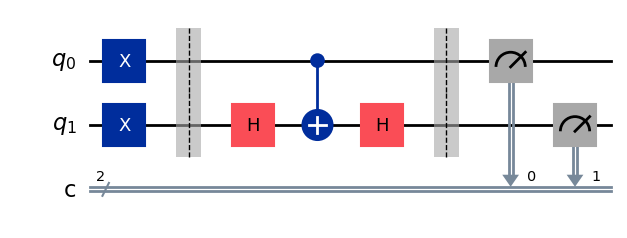


Estado inicial: |11⟩
CZ|11⟩ = -|11⟩ → fase global -1 (no observable en probabilidades)
Resultados de medición (1024 shots): {'11': 1024}
→ Siempre obtenemos '11' con 100% de probabilidad



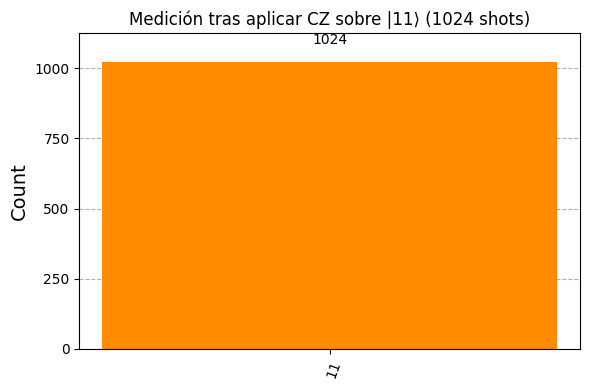

In [2]:
# ========================
# SIMULACIÓN EXPERIMENTAL: Aplicar CZ sobre |11⟩ y medir
# ========================
print("=== SIMULACIÓN EXPERIMENTAL: CZ sobre |11⟩ ===")

qc_test = QuantumCircuit(2, 2)

# Preparar el estado |11⟩
qc_test.x(0)
qc_test.x(1)

qc_test.barrier()

# Insertar directamente la implementación de CZ (H - CX - H)
qc_test.h(1)          # H en q1
qc_test.cx(0, 1)      # CNOT control q0 → target q1
qc_test.h(1)          # H en q1 nuevamente

qc_test.barrier()
qc_test.measure([0, 1], [0, 1])

# Mostrar el circuito de prueba
print("Circuito de prueba (prepara |11⟩, aplica CZ custom, mide):")
display(qc_test.draw(output='mpl'))

# Ejecutar simulación
simulator = AerSimulator()
shots = 1024
result = simulator.run(qc_test, shots=shots).result()
counts = result.get_counts()

print(f"\nEstado inicial: |11⟩")
print(f"CZ|11⟩ = -|11⟩ → fase global -1 (no observable en probabilidades)")
print(f"Resultados de medición ({shots} shots): {counts}")
print("→ Siempre obtenemos '11' con 100% de probabilidad\n")

# Histograma
display(plot_histogram(counts, 
                      title="Medición tras aplicar CZ sobre |11⟩ (1024 shots)",
                      color='darkorange',
                      figsize=(6, 4)))